Matthew Kline

## Exercise 7.1

In [1]:
from __future__ import print_function

import sys
import numpy as np
import math

import first
import thinkplot
import thinkstats2

In [11]:
#defining functions for our graphs
def scatter(ages, weights, alpha=1.0):
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)


def binned(df):
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)
        thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     legend=True)


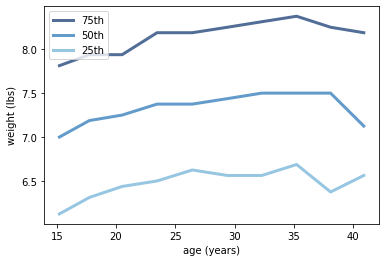

In [12]:
thinkstats2.RandomSeed(17)
    
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
binned(live)


thinkstats2 Corr 0.06883397035410908
thinkstats2 SpearmanCorr 0.09461004109658226


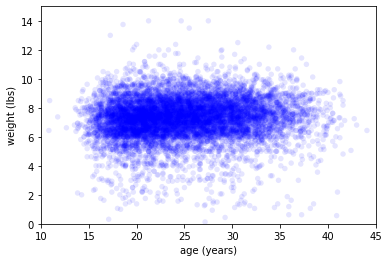

In [13]:
ages = live.agepreg
weights = live.totalwgt_lb
print('thinkstats2 Corr', thinkstats2.Corr(ages, weights))
print('thinkstats2 SpearmanCorr', 
      thinkstats2.SpearmanCorr(ages, weights))

scatter(ages, weights, alpha=0.1)


The Scatter plot shows a weak realtion between the variables, which is supported by the correlation scores that are both relativly low. The precentiles prove that the relationship is non linear, birth rate increases quickly in all cases between 15-25 years, but the other patterns are weaker.

## Exercise 8.2

In [22]:
#code provided by esitmation.py

from __future__ import print_function, division

import thinkstats2
import thinkplot

import math
import random
import numpy as np

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)


def Estimate1(n=7, m=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))


def Estimate2(n=7, m=1000):
    """Evaluates S and Sn-1 as estimators of sample variance.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))


def Estimate3(n=7, m=1000):
    """Evaluates L and Lm as estimators of the exponential parameter.

    n: sample size
    m: number of iterations
    """
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

    print('Experiment 3')
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))


def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    """Plots the sampling distribution of the sample mean.

    mu: hypothetical population mean
    sigma: hypothetical population standard deviation
    n: sample size
    m: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    means = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)

    stderr = RMSE(means, mu)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='sample mean',
                     ylabel='CDF',
                     title = 'Sampling distribution')


Experiment 1
rmse xbar 0.3617464151801005
rmse median 0.4525844764840343
Experiment 2
mean error biased -0.1548231745656196
mean error unbiased -0.013960370326556188
Experiment 3
rmse L 1.139311441618819
rmse Lm 1.6137356616028096
mean error L 0.3944559283930306
mean error Lm 0.45000422951234087
standard error 2.4633774525334506
confidence interval (85.87495516644418, 93.90918257387995)


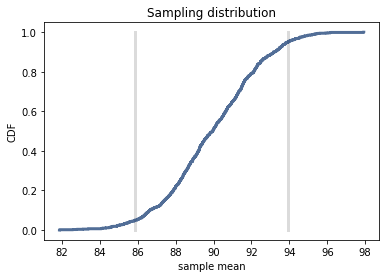

In [23]:
thinkstats2.RandomSeed(17)

Estimate1(m=200)
Estimate2(m=200)
Estimate3(m=200)
SimulateSample()

Xbar and mean are lower mean error as m is increased, this means neither should be considered biased.

## Exercise 8.2

In [20]:
def SimulateSample(lam=2, n=10, m=1000):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title = 'Sampling distribution')

    return stderr

standard error 2.579841508830138
confidence interval (85.8028978830365, 94.30513154022077)


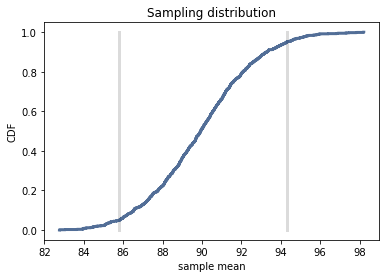

In [24]:
SimulateSample()

standard error 0.23634974497084424
confidence interval (89.60626664684091, 90.37276422245311)


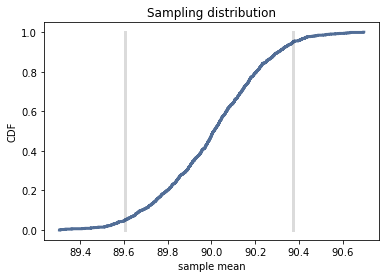

In [26]:
SimulateSample(n=1000)

In [29]:
#Recreate same simulation without creating graph for second part
def SimulateSample2(lam=2, n=10, m=1000):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)

    return stderr

In [36]:
std =[]
num =[]
for i in range(50):
    ran = random.randint(1, 10000)
    num.append(ran)
    print("num used for n: " + str(ran))
    stder = SimulateSample2(n=ran)
    std.append(stder)

num used for n: 4142
standard error 0.030971356909661435
confidence interval (1.949914552819874, 2.0507663991820553)
num used for n: 8028
standard error 0.022128775543183935
confidence interval (1.9656211963220898, 2.0370900879395277)
num used for n: 1869
standard error 0.04534906314178728
confidence interval (1.9296868054035758, 2.0770485935038416)
num used for n: 4039
standard error 0.03145902858137031
confidence interval (1.9460944582060797, 2.049742197800456)
num used for n: 4123
standard error 0.030361832550681755
confidence interval (1.9514005179909613, 2.050497401568493)
num used for n: 7704
standard error 0.023763029463882337
confidence interval (1.960180879748048, 2.0418348323608586)
num used for n: 8749
standard error 0.021376005502697085
confidence interval (1.9657004579221984, 2.0359620699799374)
num used for n: 797
standard error 0.07296285945348356
confidence interval (1.8870928592302905, 2.1232566918005515)
num used for n: 5101
standard error 0.02824101564037211
confiden

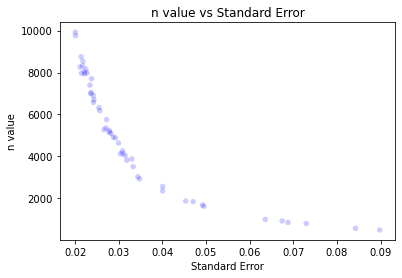

In [39]:
thinkplot.Scatter(std, num)
thinkplot.Config(xlabel='Standard Error',
                     ylabel='n value',
                     title = 'n value vs Standard Error',
                     legend=False)

As we can see, the larger the n value, the small the standard error becomes.